<a href="https://colab.research.google.com/github/Leonardo-Dias-Up/Colab/blob/main/DataViva_Atividade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> **IMPORTAÇÃO DAS BIBLIOTECAS**

In [ ]:
!pip install geopandas
!pip install pysal
!pip install cartopy
!pip install --upgrade matplotlib
!pip install windrose
!pip install linearmodels
!pip install ipeadatapy
!!pip install python-bcb
!pip install factor_analyzer
!pip install sgs
!apt-get install -y fonts-liberation
import matplotlib.pyplot as plt

In [5]:
from google.colab import auth
from google.cloud import bigquery
from google.oauth2 import service_account
from google.colab import files

import pandas as pd
import geopandas as gpd
import numpy as np

from libpysal import weights
import matplotlib.pyplot as plt
import seaborn as sns
import splot
from pysal.explore import esda
from pysal.model import spreg
import pysal as ps
import scipy.sparse as sp
import statsmodels.api as sm
from libpysal.weights import Queen, Rook, KNN, DistanceBand
import pysal.lib as lps
from esda.moran import Moran
import libpysal
from matplotlib.colors import LinearSegmentedColormap
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from sklearn.preprocessing import normalize
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.image as mpimg
from PIL import Image
from linearmodels.panel import RandomEffects, PanelOLS
from scipy.stats import f_oneway
from scipy.stats import pearsonr, norm
from matplotlib.gridspec import GridSpec
import networkx as nx

/usr/local/lib/python3.10/dist-packages/spaghetti/network.py:40: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(dep_msg, FutureWarning, stacklevel=1)


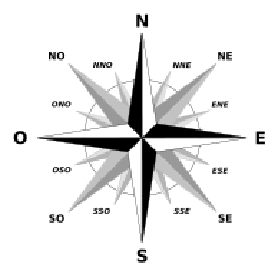

In [6]:
# Melhora a resolução da imagem
img = mpimg.imread('/content/drive/MyDrive/Colab Notebooks/TCC/windrose.png')
dpi = 70
height, width, nbands = img.shape
figsize = width / float(dpi), height / float(dpi)
fig = plt.figure(figsize=figsize)
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
ax.imshow(img, interpolation='nearest')

> **IMPORTAÇÃO DAS BASES DE DADOS TRATADAS VIA GOOGLE CLOUD PLATAFORM - BIG QUERY**

In [7]:
# Configurar o cliente do BigQuery
credentials = service_account.Credentials.from_service_account_file(r"/content/drive/MyDrive/Colab Notebooks/TCC/bigquey-chave.json")
project_id = 'rais-359504'
client = bigquery.Client(credentials=credentials, project=project_id)

In [ ]:
# Bases
geo_mun = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/DataViva/BR_Municipios_2022.shp')
base = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataViva/RAIS_MG_2010_2020.csv', sep=';', encoding='UTF-8')

In [16]:
# Para float
geo_mun.CD_MUN = geo_mun.CD_MUN.astype(float)
base.id_municipio = base.id_municipio.astype(float)

# Para o merge
geo_mun = geo_mun.rename(columns={'CD_MUN':'id_municipio'})

In [17]:
# Carregando os dataframes a partir dos arquivos Excel e CSV usando Pandas e Shapefile usando o geopandas
df = pd.merge(base, geo_mun, on='id_municipio', how='left')
df.head()

,ano,id_municipio,cnae_divisao,massa_salarial_dezembro,num_emp,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,2010,3118601.0,27,10517813.06,4552,Contagem,MG,194.746,"POLYGON ((-44.04721 -19.97373, -44.04728 -19.9..."
1,2010,3151800.0,7,2451832.99,1235,Poços de Caldas,MG,546.958,"POLYGON ((-46.48069 -21.70049, -46.48045 -21.7..."
2,2010,3131703.0,7,30517730.17,11625,Itabira,MG,1253.704,"POLYGON ((-43.28319 -19.76310, -43.28322 -19.7..."
3,2010,3106200.0,78,14598736.03,19274,Belo Horizonte,MG,331.354,"POLYGON ((-43.86960 -19.92388, -43.86960 -19.9..."
4,2010,3118601.0,78,4044620.92,5501,Contagem,MG,194.746,"POLYGON ((-44.04721 -19.97373, -44.04728 -19.9..."


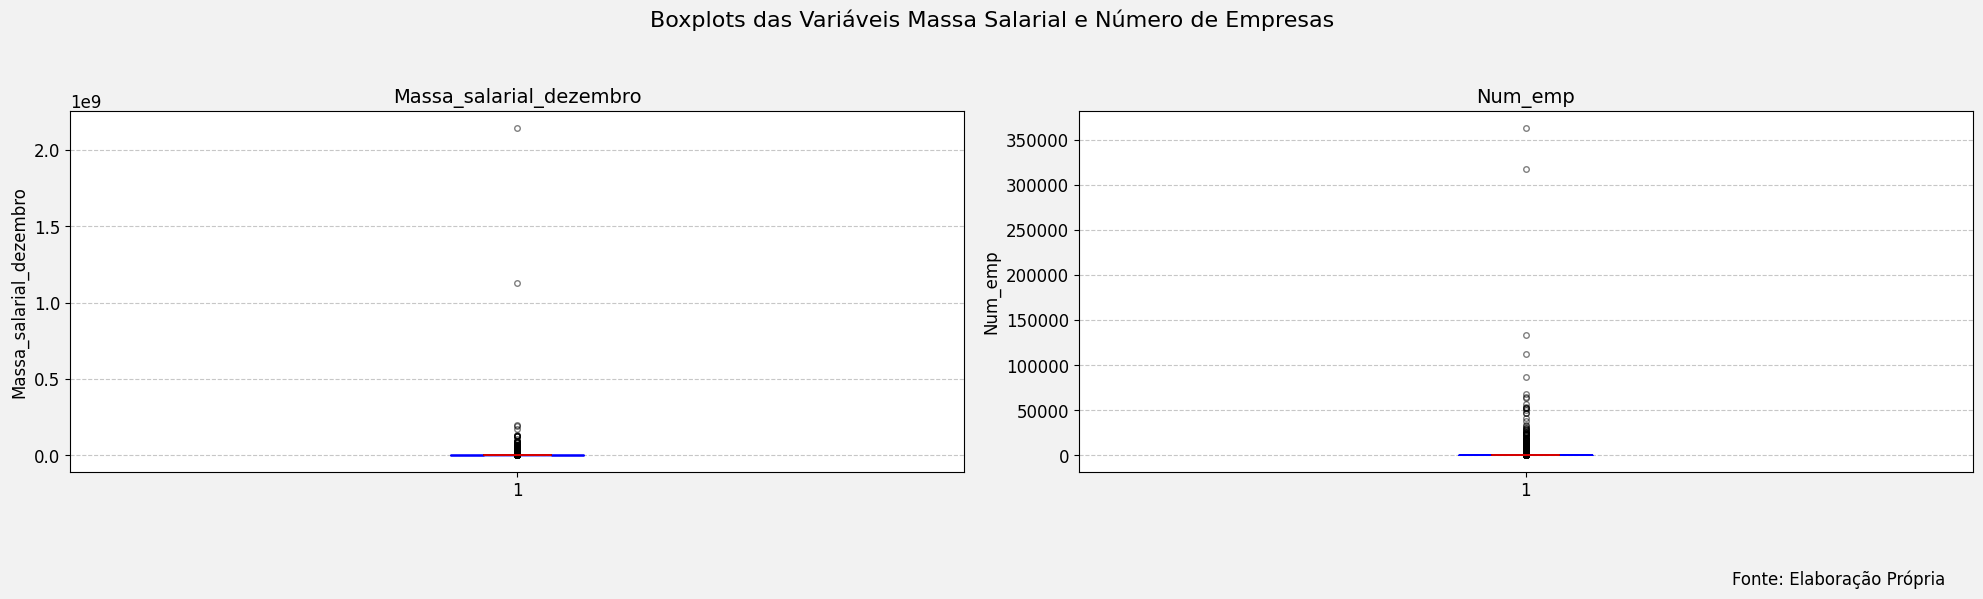

In [26]:
# Selecionar as variáveis numéricas do dataframe
numerical_cols = ['massa_salarial_dezembro', 'num_emp']

# Criar os boxplots para cada variável
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_cols), figsize=(20, 7))

for i, col in enumerate(numerical_cols):
    bp = axes[i].boxplot(df[col], notch=True, patch_artist=True)
    axes[i].set_title(col.capitalize(), fontsize=14)
    axes[i].set_ylabel(col.capitalize(), fontsize=12)
    axes[i].tick_params(axis='both', which='major', labelsize=12)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)
    for patch in bp['boxes']:
        patch.set_facecolor('lightblue')
        patch.set_edgecolor('blue')
    for whisker in bp['whiskers']:
        whisker.set(color='black', linewidth=1.2, linestyle='-')
    for cap in bp['caps']:
        cap.set(color='black', linewidth=1.2)
    for median in bp['medians']:
        median.set(color='red', linewidth=1.2)
    for flier in bp['fliers']:
        flier.set(marker='o', color='black', alpha=0.5, markersize=4)

fig.suptitle('Boxplots das Variáveis Massa Salarial e Número de Empresas', fontsize=16)
fig.set_facecolor('#f2f2f2')  # Definir cor de fundo
plt.rc('font', family='sans-serif', size=12)
plt.text(0.85, -.3, 'Fonte: Elaboração Própria', ha='center', va='center', transform=axes[-1].transAxes)
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()